## Data Exploration

In [18]:
import numpy as np 
import pandas as pd
import h5py as h5
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# The inputs to the Neural Network
with h5.File('../qlk_jetexp_nn_training_database_minimal.h5', "r") as f:
        inputs = f['input']['block0_values'][()]
        input_names = f['input']['block0_items'][()]
        index_inp = f['input']['axis1'][()]   #row number from 0 to len(inputs)
        
        # The target outputs for the NN
        outputs = f['output']['block0_values'][()]
        output_names = f['output']['block0_items'][()]
        index_out = f['output']['axis1'][()]   #row number from 0 to len(inputs) with some missing rows
        

In [3]:
#Load the data into the dataframe
df_in = pd.DataFrame(inputs,index_inp,input_names)
df_out = pd.DataFrame(outputs,index_out, output_names)

In [4]:
df_in.head()

,b'Ane',b'Ate',b'Autor',b'Machtor',b'x',b'Zeff',b'gammaE',b'q',b'smag',b'alpha',b'Ani1',b'Ati0',b'normni1',b'Ti_Te0',b'logNustar'
0,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,-2.386978,0.032854,1.0,-1.200474
1,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,-0.750587,0.032854,1.0,-1.200474
2,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,0.885805,0.032854,1.0,-1.200474
3,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,2.522196,0.032854,1.0,-1.200474
4,1.087643,-2.386978,0.0,0.0,0.441791,2.373913,0.0,0.884064,0.427551,0.008614,2.236213,4.158588,0.032854,1.0,-1.200474


In [5]:
df_out.head()

,b'R0',b'efeETG_GB',b'efeTEM_GB',b'efiITG_GB',b'efeITG_GB_div_efiITG_GB',b'eflITG_GB_div_efiITG_GB',b'efhITG_GB_div_efiITG_GB',b'pfeITG_GB_div_efiITG_GB',b'pfiITG_GB_div_efiITG_GB',b'pflITG_GB_div_efiITG_GB',...,b'dfhTEM_GB_div_efeTEM_GB',b'vceTEM_GB_div_efeTEM_GB',b'vciTEM_GB_div_efeTEM_GB',b'vclTEM_GB_div_efeTEM_GB',b'vchTEM_GB_div_efeTEM_GB',b'vtlTEM_GB_div_efeTEM_GB',b'vthTEM_GB_div_efeTEM_GB',b'vriTEM_GB_div_efeTEM_GB',b'vrlTEM_GB_div_efeTEM_GB',b'vrhTEM_GB_div_efeTEM_GB'
0,2.903508,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.903508,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.903508,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.903508,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.903508,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How many NaN values?

In [6]:
n_outputs = df_out.shape[0]
n_var = df_out.shape[1]
summary_array = np.zeros((n_var,2))
for i, column in enumerate(df_out):
    # % Nan
    n_nan = df_out[column].isna().sum()
    perc_nan =  n_nan * 100/n_outputs
    
    summary_array[i][0] = 100 - perc_nan
    summary_array[i][1] = n_outputs - n_nan  

In [7]:
df_nan_count = pd.DataFrame(summary_array, columns = ['Perc_data', 'N_data'])
df_nan_count['var_name'] = list(df_out.columns)
df_nan_count['var_index'] = np.arange(0,n_var,1)

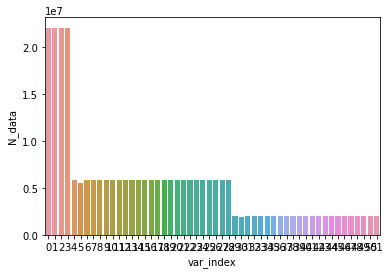

In [8]:
ax = sns.barplot(x="var_index", y="N_data", data=df_nan_count)

### Task 1:
- train a classifier to classify whether a given input will give an output (in QuaLiKiz) 
- X: QLKNN inputs, Y: 1 or 0. Output produced = 1, no output produced = 0


### Training Data Exploration

In [21]:
train_data = pd.read_pickle("/share/rcifdata/jbarr/UKAEAGroupProject/train_data.pkl")

In [8]:
train_data_sample = train_data.sample(10_000)

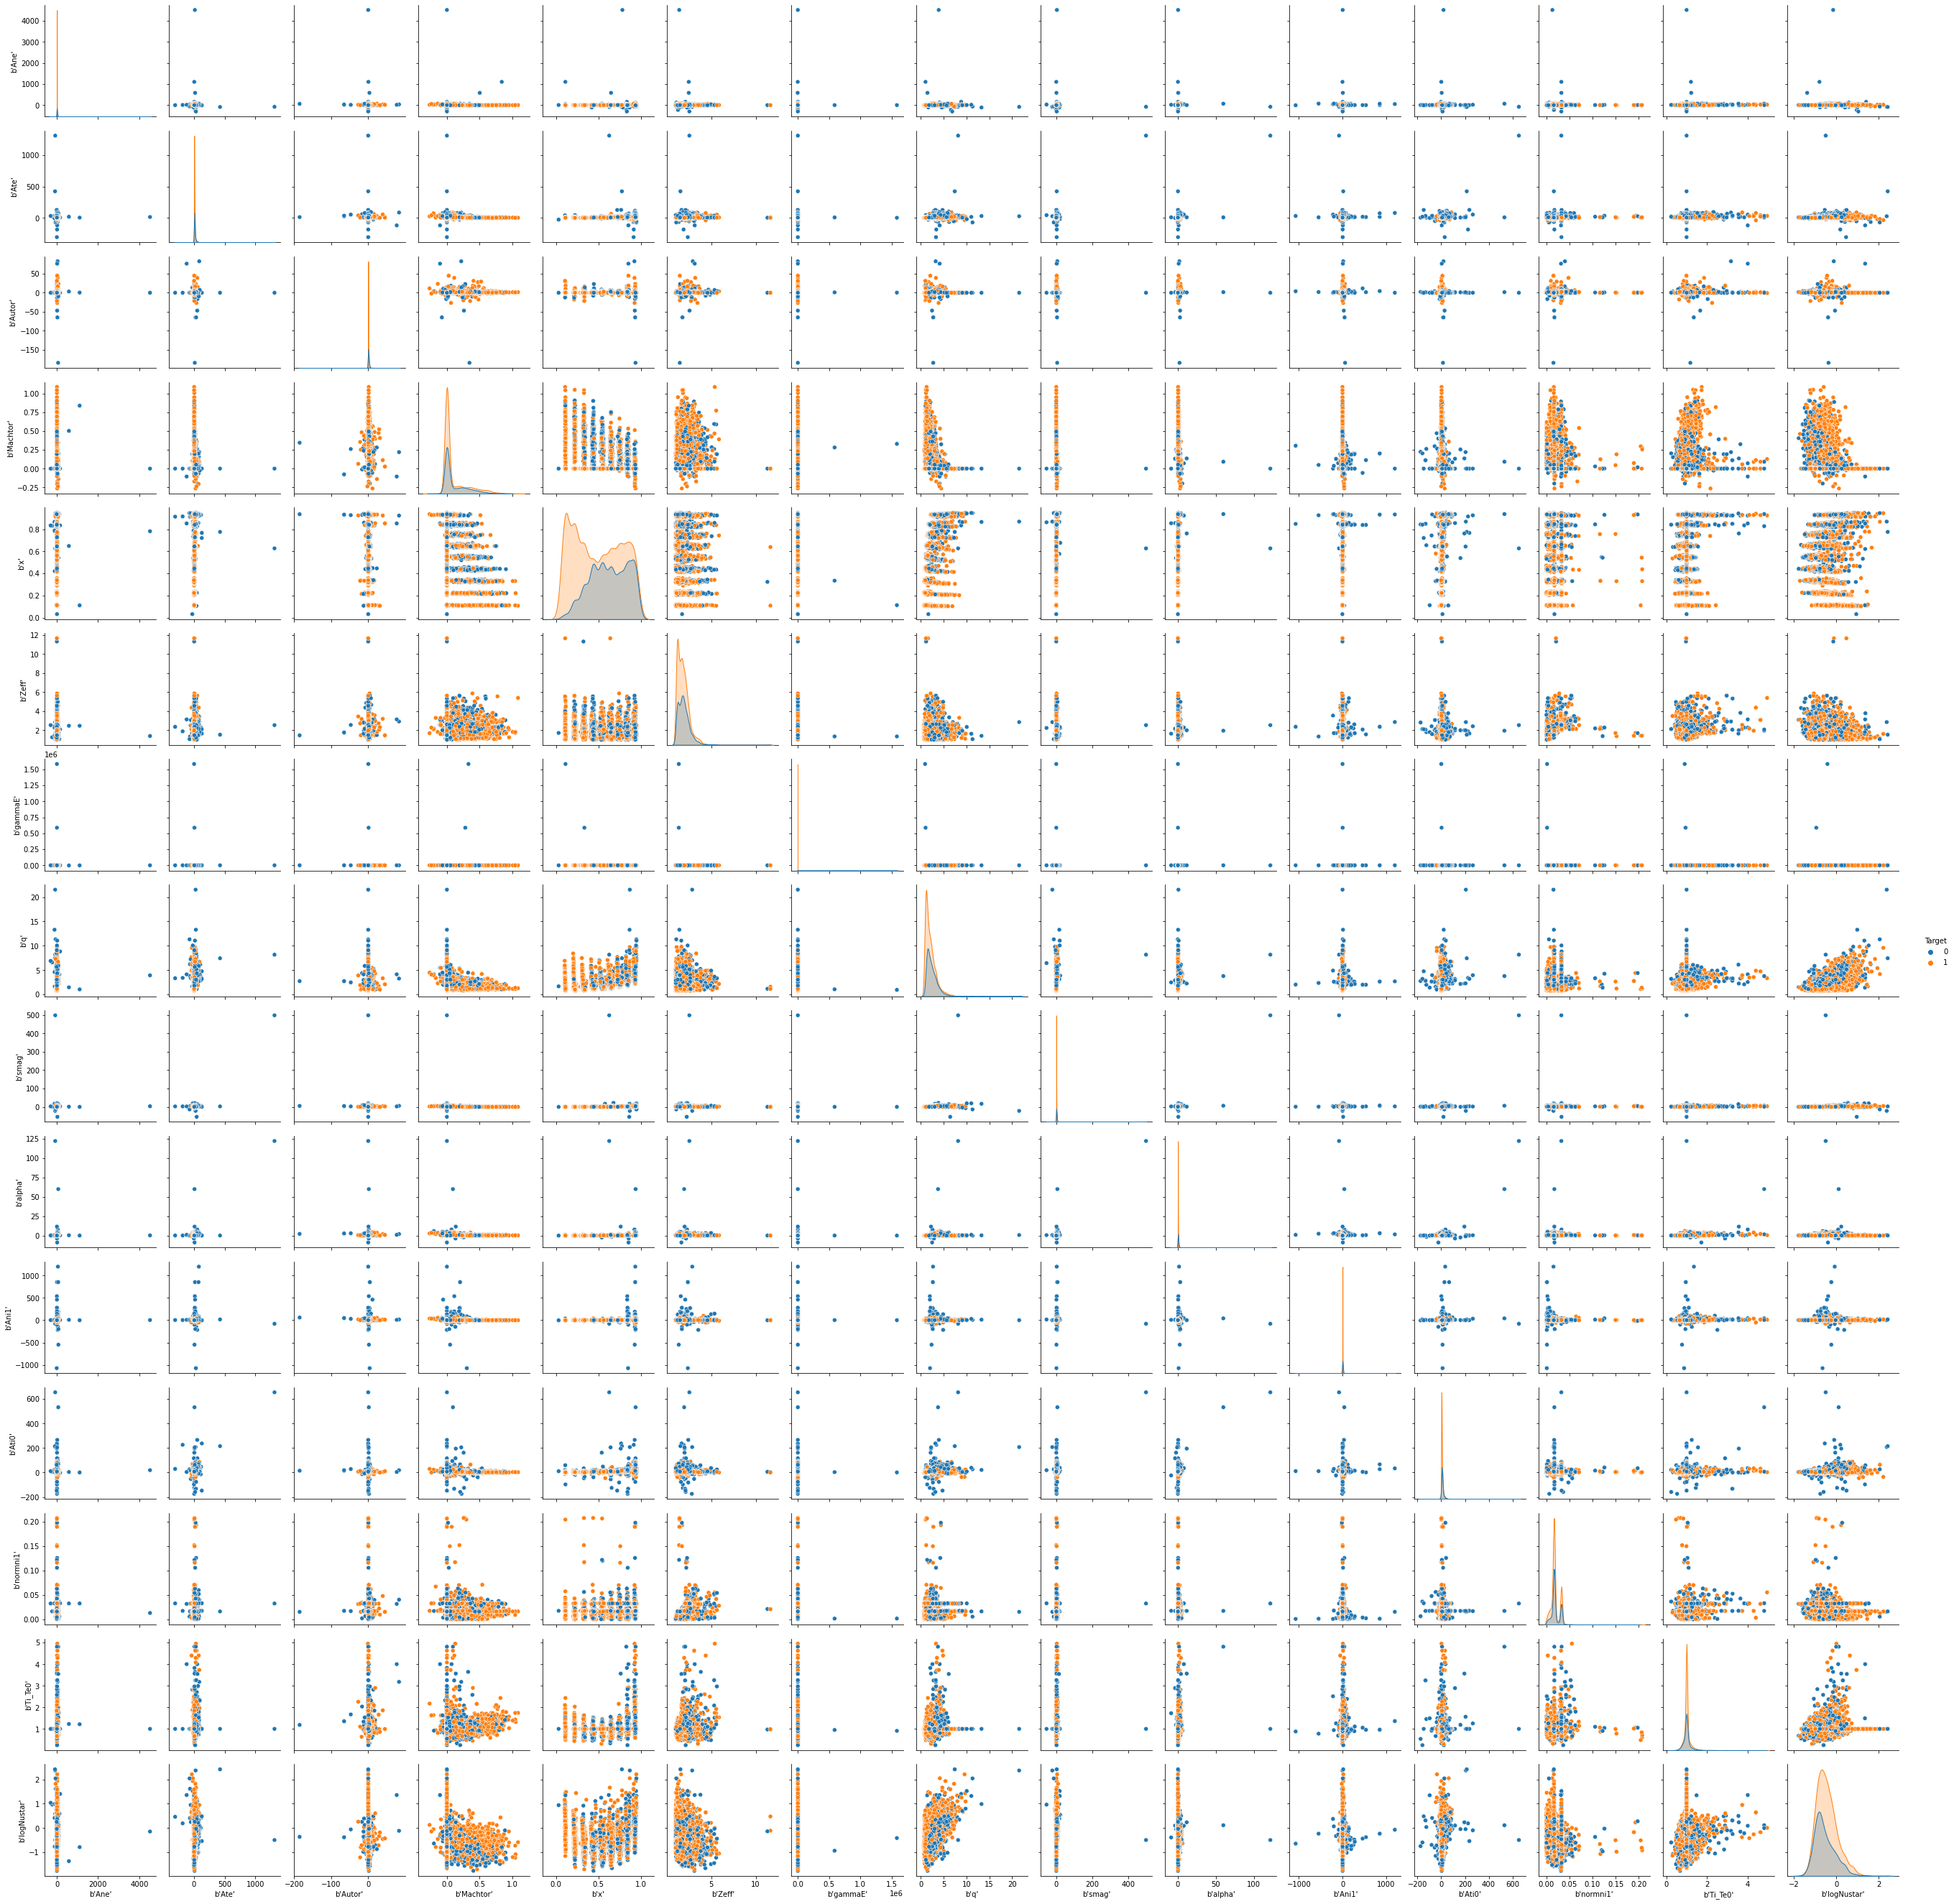

In [11]:
sns.pairplot(train_data_sample, hue='Target');

In [9]:
index_diff = np.setdiff1d(index_inp, index_out) # find indices in input but not output data

In [11]:
in_out = np.ones(df_in.shape[0])
in_out[index_diff] = 0 

In [13]:
df_in_array = df_in.to_numpy()

In [15]:
no_output = df_in_array[np.where(in_out == 0)]
yes_output =df_in_array[np.where(in_out == 1)] 
assert no_output.shape[0] + yes_output.shape[0] == df_in_array.shape[0]

In [16]:
columns = list(df_in.iloc[:,:-1].columns)

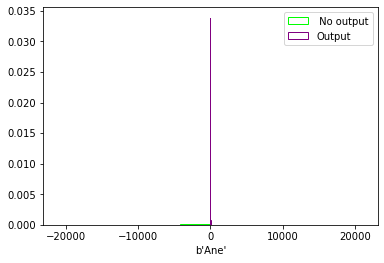

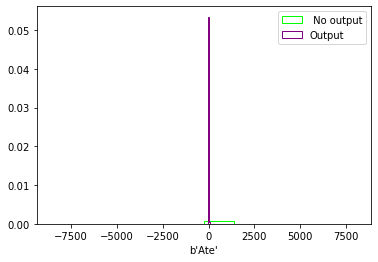

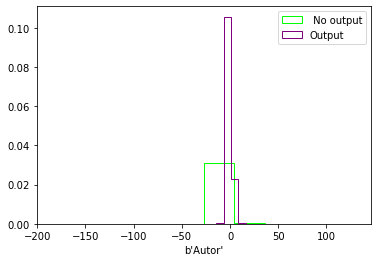

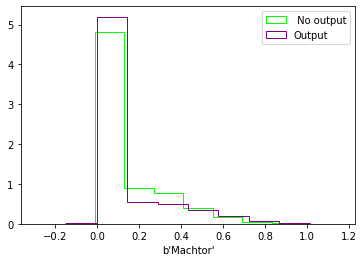

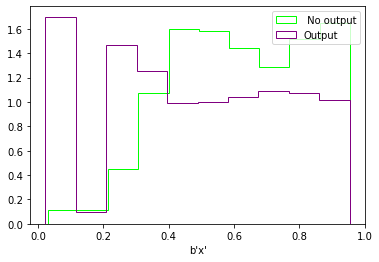

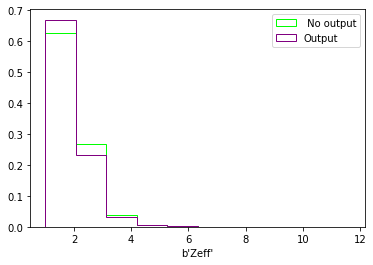

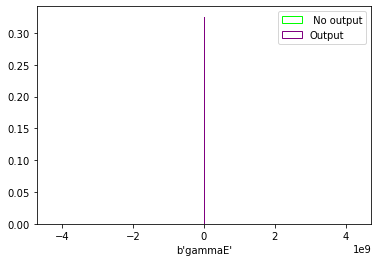

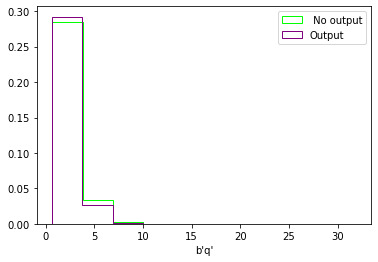

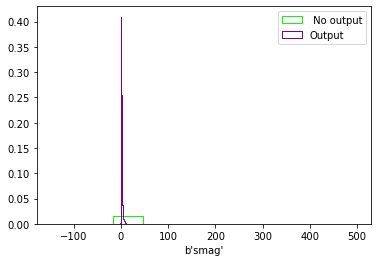

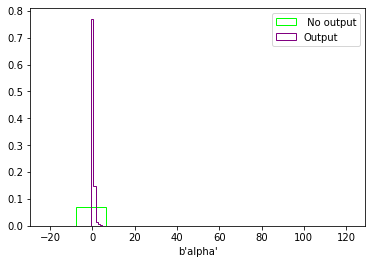

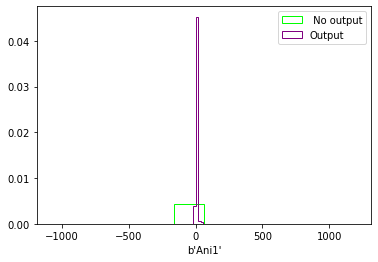

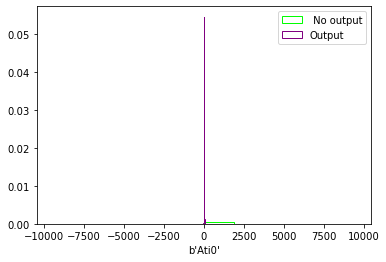

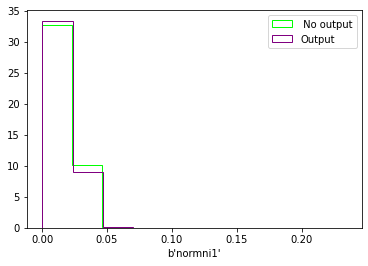

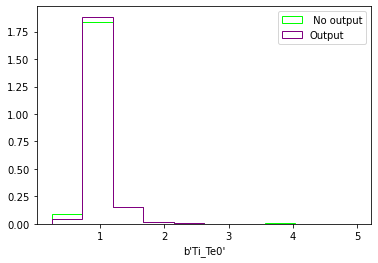

In [19]:
for i, column in enumerate(columns):
    plt.figure()
    plt.hist(no_output[:,i], histtype = 'step', color = 'lime', label =" No output", density = True);
    plt.hist(yes_output[:,i], histtype = 'step', color = 'purple', label = "Output", density = True);
    plt.legend()
    plt.xlabel(column)

In [22]:
train_data.iloc[:,:-1].columns

Index([      b'Ane',       b'Ate',     b'Autor',   b'Machtor',         b'x',
            b'Zeff',    b'gammaE',         b'q',      b'smag',     b'alpha',
            b'Ani1',      b'Ati0',   b'normni1',    b'Ti_Te0', b'logNustar'],
      dtype='object')